### Question 2

### What is given:

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("data/noisypopulation.csv")
df.head()

,f,x,y
0,0.047790,0.00,0.011307
1,0.051199,0.01,0.010000
2,0.054799,0.02,0.007237
3,0.058596,0.03,0.000056
4,0.062597,0.04,0.010000


In [3]:
df.shape

(200, 3)

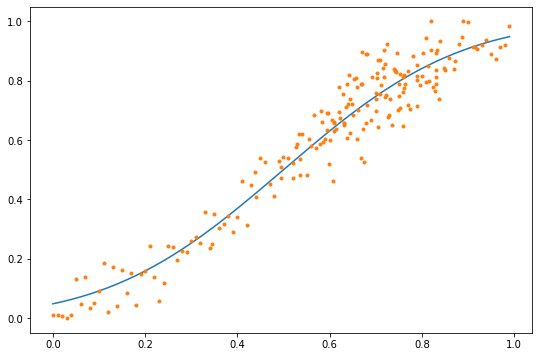

In [4]:
plt.figure(figsize=(9,6))
plt.plot(df.x, df.f)
plt.plot(df.x, df.y, '.')
plt.show()

### Solution Starts here:  (help taken from linear regression lecture notebooks provided by Rahul)

#### Fitting a reg. line for the given data using sklearn

In [5]:
xgrid = np.linspace(0,1,1000)
Xgrid = xgrid.reshape(-1,1)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
X = df.x.values.reshape(-1,1) # reshape into list of lists format

In [8]:
X.shape, df.y.shape

((200, 1), (200,))

In [9]:
lr = LinearRegression()
lr.fit(X,df.y)
fgrid = lr.predict(Xgrid)

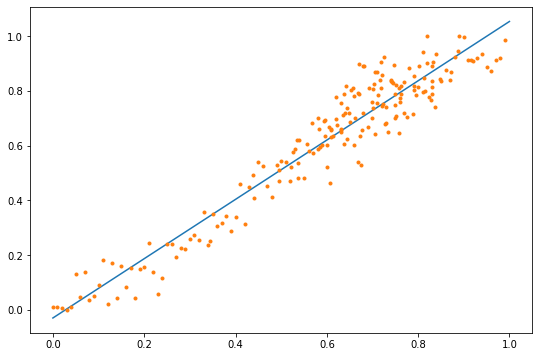

In [10]:
plt.figure(figsize=(9,6))
plt.plot(Xgrid, fgrid)
plt.plot(X, df.y, '.')
plt.show()

#### Bootstrapping to create more samples and plotting new reg. lines for each new boostrapped sample

In [12]:
sample_indices = np.random.choice(range(100), size=40)
sample_indices

array([ 8, 80, 57,  5, 98, 11, 63, 76, 31, 15,  3, 23, 88, 54, 45, 67, 90,
       50, 83, 65, 73, 81, 65, 30, 70, 36, 98, 43, 95, 68,  0, 67, 64, 47,
       57, 83, 68, 49, 73, 92])

<Figure size 648x432 with 0 Axes>

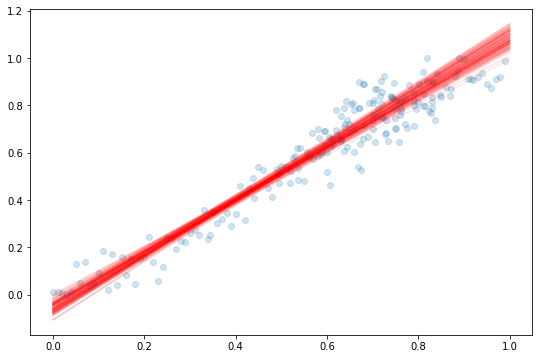

In [13]:
plt.figure(figsize = (9,6))

slopes = np.zeros(100)
intercepts = np.zeros(100)

for i in range(100):
    sample_indices = np.random.choice(range(100), size=40)
    Xsample = X[sample_indices]
    ysample = df.y[sample_indices]
    lr = LinearRegression().fit(Xsample, ysample)
    slopes[i] = lr.coef_
    intercepts[i] = lr.intercept_

fpredicts = intercepts + slopes*Xgrid
fpredicts.shape

plt.figure(figsize=(9,6))
plt.plot(X, df.y, 'o', alpha=0.2)
for line in range(100):
    vals = fpredicts[:,line]
    plt.plot(Xgrid, vals, color="r", alpha=0.1)


#### Randomly chosing 20 lines and generating samples from those lines

In [14]:
sample_indices1 = np.random.choice(range(100), size=20)
sample_indices1

array([79, 66, 74,  0, 76, 64, 66, 28, 27,  3,  4, 26,  6,  2,  3, 92, 28,
       67, 53, 70])

In [15]:
sample_slopes = slopes[sample_indices1]
sample_intercepts = intercepts[sample_indices1]

fpredicts1 = sample_intercepts + sample_slopes*Xgrid

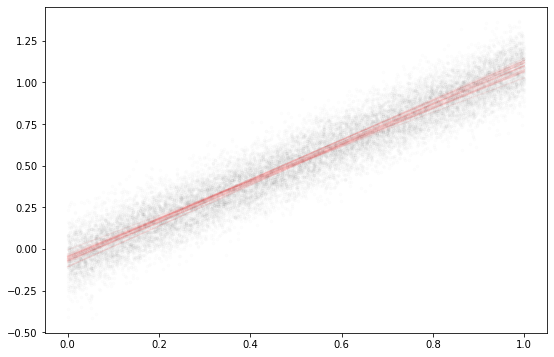

In [16]:
from scipy.stats import norm

plt.figure(figsize=(9,6))

for line in range(20):
    vals1 = fpredicts1[:,line]
    vals1
    sigma = (1/n)*()*()
    gaussvals1 = norm(vals1, sigma).rvs()
    plt.plot(Xgrid, vals1, color="r", alpha=0.05)
    plt.plot(Xgrid, gaussvals1, '.', color="k", alpha=0.009)